## CREDIT CARD LEAD GENERATION PREDICTION

### About The Dataset

* In this project or case, the bank wants to cross-sell its credit cards to its existing customers.the bank has identified a set of customers that are eligible for taking these credit cards

* This dataset is taking from "KAGGLE"

### Problem Statement:

* TO predict which individuals or groups of people are most likely to apply for a credit card in "NEAR FUTURE"

### Project Aim:

* The aim of this prediction is to identify potential customers who are more likeye to be intersted in credit card.
* In this project i used "FOUR" machine learning algorithm and check which algorithm perform well on this data.

* The algorithms are.

* 1.Logestic Regression

* 2.Decision Tree

* 3.Random Forest

* 4.Ada boost Classifer

## Importing Necessary Libraries

In [1]:
import pandas as pd     # it's is core library for data manipulation and data analysis
import numpy as np   # it's is core library for numeric and scientific computing
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading The Dataset

In [2]:
df=pd.read_csv('/kaggle/input/credit-card-buyers/train data credit card.csv')

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Lets check what the columns mentioned in the dataset says

* ID=Unique identifier for a row

* Gender = Gender of the Customer

* Age = Age of the customer (in Years)

* Region_code = code of the Region for the Customers

* Occuption = Occuption Type for the customer

* Channel_code = Acquisition Channel code for Customer

* Vintage = Vintage for thr customer (In Months)

* Credit_Product = if the customer has any active Credit product(home loan,Personal loan,Credit card etc.)

* Avg Account Balance = Averge account balance for the Customer in last 12 Months

* Is_Active = if the Customer is active in last 3 Months

* Is_Lead(Target) = if the Customer is interested for the Credit Card

### Checking The Dataset

In [4]:
# checking  the size  of the dataset

df.size

2702975

* The size of Dataset are "2702975"

In [5]:
# checking shape of dadaset

df.shape

(245725, 11)

* In this Dataset we have "245725" Rows and "11" Columns

In [6]:
# checking  the info of the dataset

df.info()

# info() function provide a summary of the DataFrame including its column names,datatypes and number of null value in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


* This Dataset contained four(4) numerical colunms and six(6) are catgorical colunms.
* And also see the "Credit_Product" column contained null values.

In [7]:
df.describe()

# describe () function provide a summary of statistical information such as mean,standard deviation,minimum,maximum and quartile value(25%,50%,75%)

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


### Data Preprocessing

In [8]:
# drop ID columes coz its only a Unique identifier for a row so it's nots much importants.

df.drop("ID",axis=1,inplace=True)

In [9]:
# checking  the unique value of the dataset

df.nunique()

Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

* the unique value contained by each colume are very small so we consider to taking this value for calculation

In [10]:
# checking  the null or missing  value of the dataset

df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

* in my data set the "Credit_Product" column contained the missing value to it's nesessary tred with them.

#### Replacing The Null Value

In [11]:
# The "Credit_Product" colume is in catgorical in nature so i used mode to replace  this missing value

df['Credit_Product'].fillna(df['Credit_Product'].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [13]:
# checking  the duplicate value of the dataset

df.duplicated().sum()

22

#### Removing The Duplicate Values

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Data Visualization

##### 1. Look For Imbalanced Data Set

In [15]:
# Checking value counts for 'IS_Lead' column.

df['Is_Lead'].value_counts()

0    187416
1     58287
Name: Is_Lead, dtype: int64

Text(0.5, 1.0, 'Is_Lead')

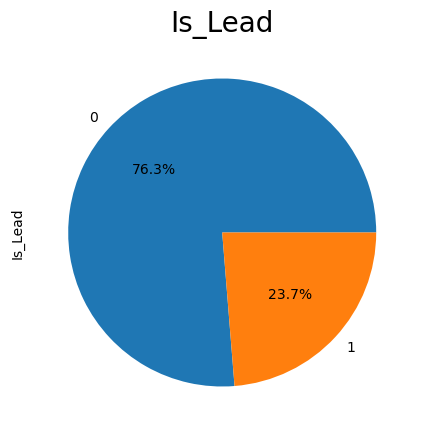

In [16]:
plt.figure(figsize=(5,5)) # Plotting a graph
df['Is_Lead'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')    # autopct display the percent value using string formatting
plt.title('Is_Lead',size=20)

##### Insight:
* if we take 100 people than form this 100 peoples only 23.7% people are our customer or possible to used credit card.

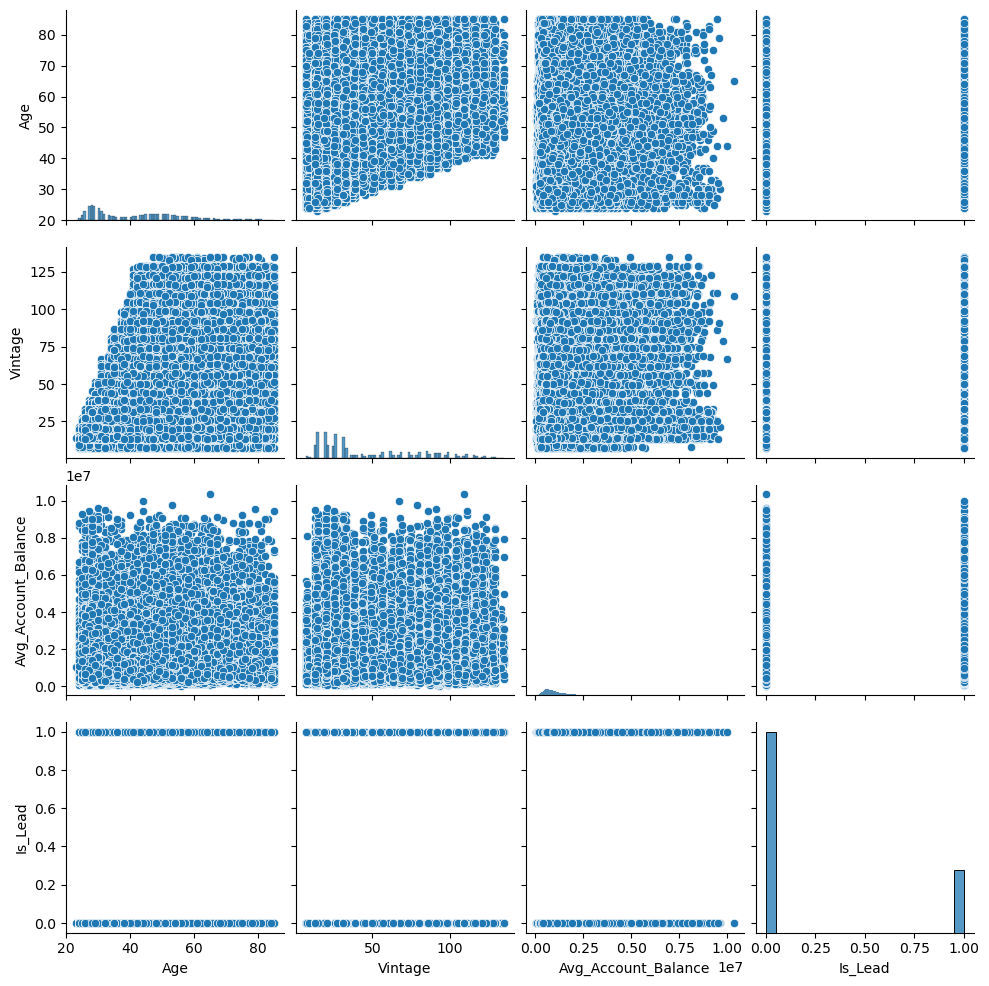

In [17]:
# pair plot are used to shows relatinship between multiple varible


sns.pairplot(df)

##### insight:
* 1.we can see as age increase the 'vintage' and "avg_account_balance' also get increase.
* 2.as age increase the avg account balance also get increase.
* 3.lead value is same for age,vintage and avg account balance

#### Checking outliers

<Axes: >

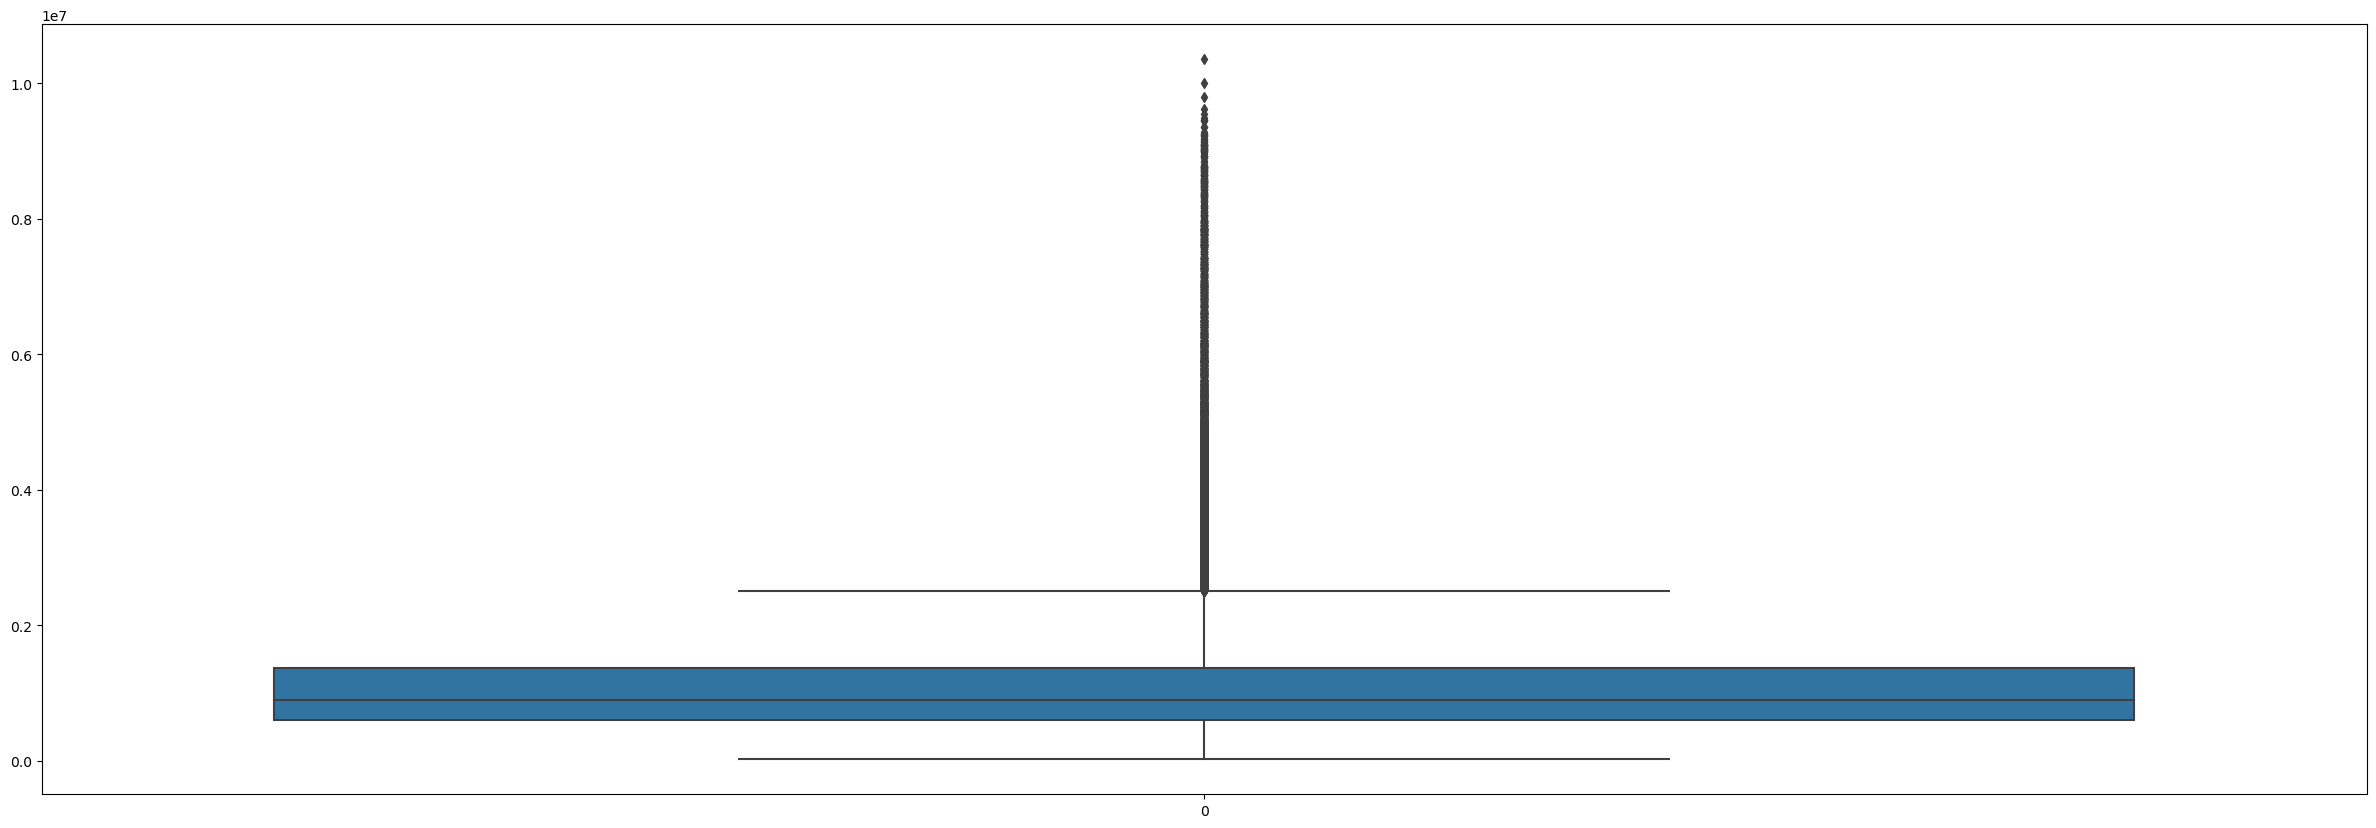

In [18]:
# i used box plot to check outilers present in data.

plt.figure(figsize=(30,10))
sns.boxplot(df["Avg_Account_Balance"])

##### Insight:
* As we can see there are outliers we can't remove them because they are considrable outliers..

####  Check whether data is normally distributed¶

* plot histrograms for each numerical varible

In [19]:
col=['Age','Vintage','Avg_Account_Balance']

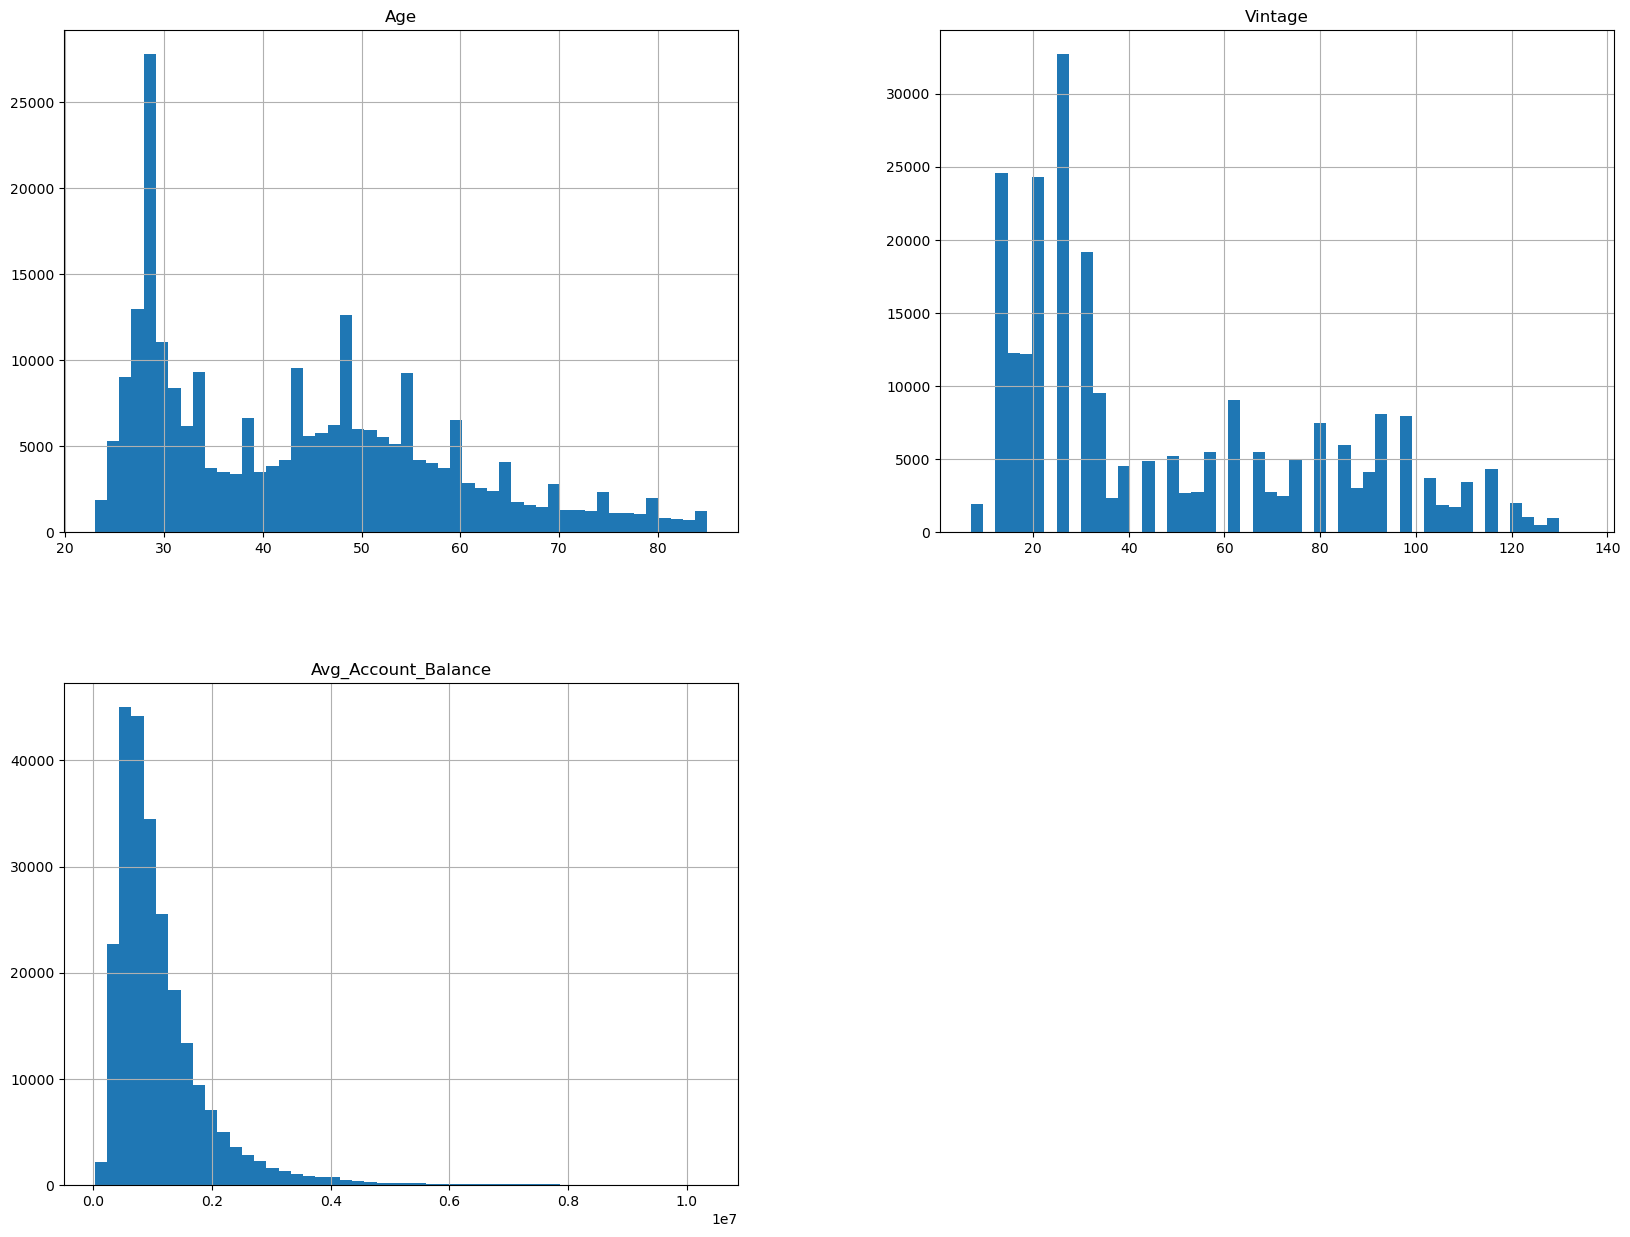

In [20]:
df[col].hist(bins=50,figsize=(20,15))
plt.show()

##### insights:
* 1.we can seen in plots the data is not normally distrubuted, in all the plots the data is left skewed(negative skewed)

#### Convert data into normally distrbute

In [21]:
# i used log transformer to normalize the data coz data is right skewed

col_to_transform =['Age','Vintage','Avg_Account_Balance']
df[col_to_transform]=df[col_to_transform].apply(lambda x:np.log(x))

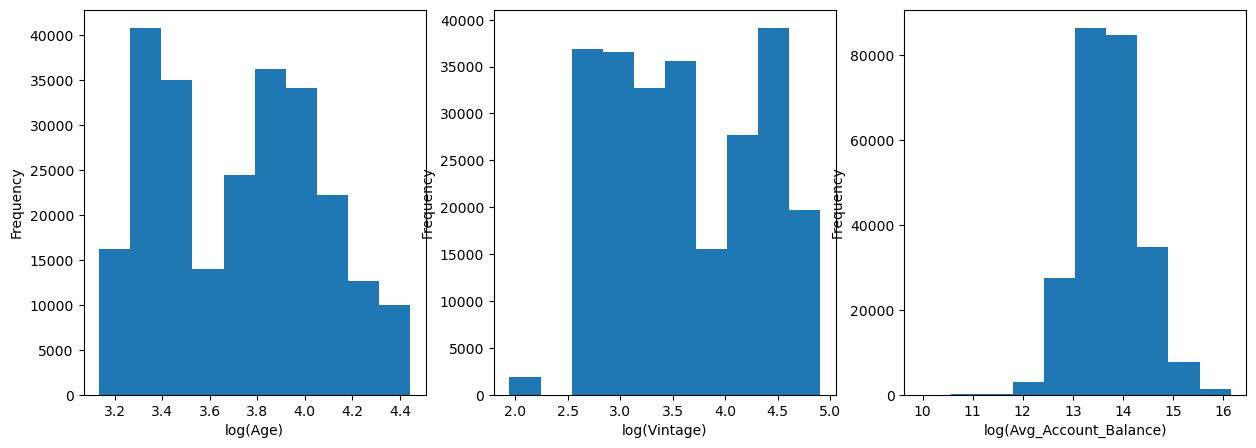

In [22]:
# visualize the transformed data using histograms

fig,axes = plt.subplots(nrows=1 ,ncols=len(col_to_transform),figsize=(15,5))

for i,col in enumerate(col_to_transform):
    axes[i].hist(df[col])
    axes[i].set_xlabel(f'log({col})')
    axes[i].set_ylabel('Frequency')
                       
plt.show()

* we can see the data is normallye distrubuted

##### Graph shows relation between gender and is_active

<Axes: xlabel='Gender', ylabel='count'>

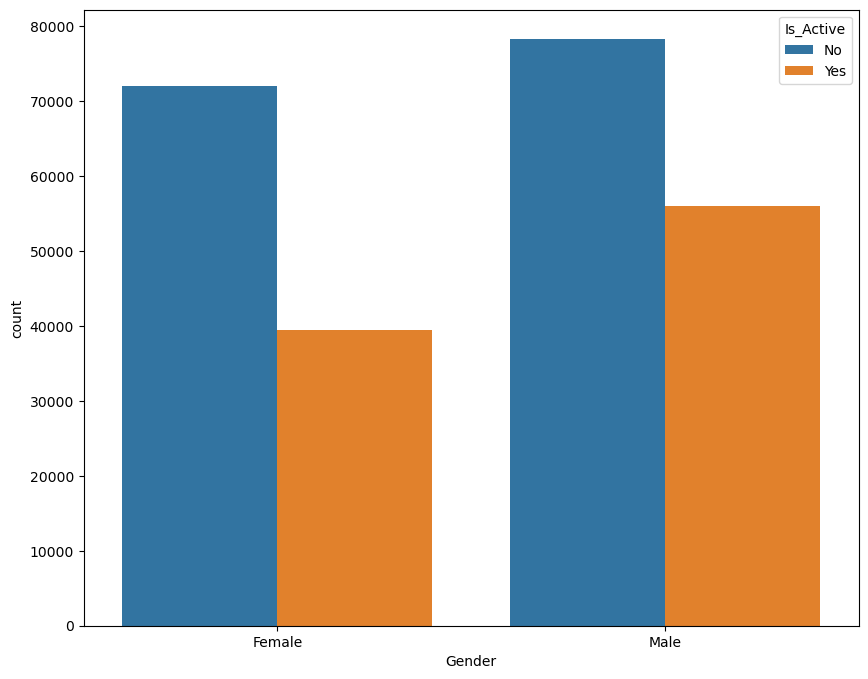

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",hue="Is_Active",data=df)

##### Insight:
* In both male and female customer the rate of inactive customer is higher as compared to active customer.
* the rate of active male customer is higher as compared to female customer.

##### Graph shows relation between gender and Credit_product

<Axes: xlabel='Gender', ylabel='count'>

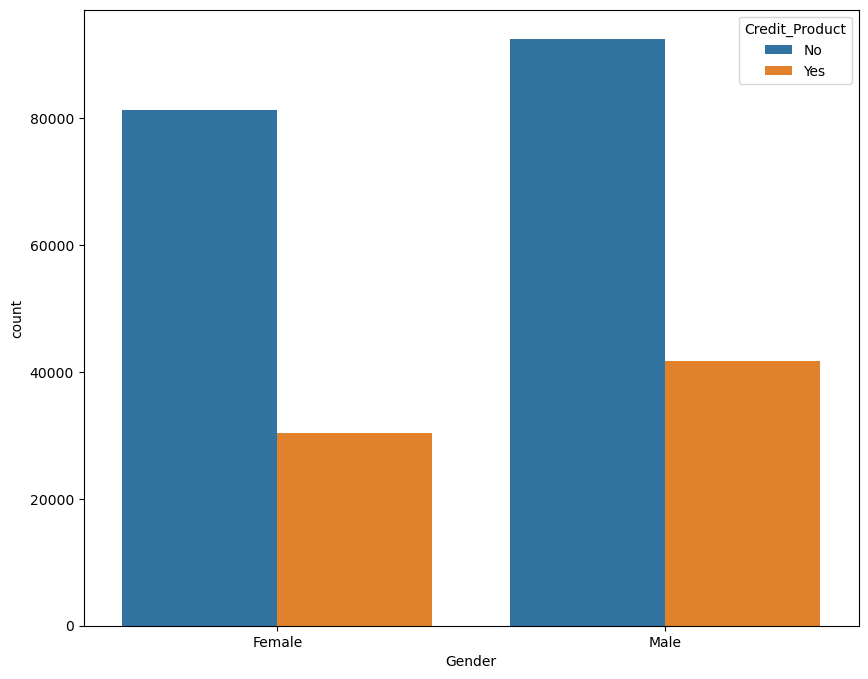

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",hue="Credit_Product",data=df)

#### Insight:
* In both male and female customer the rate of customer having credit_product on there credit card is higher as compared to customer not having credit_product.
* male customer having_credit product is higher as compared to female having credit product

#### Graph shows relation between accupation and Avg_account_Balance

<Axes: xlabel='Occupation', ylabel='Avg_Account_Balance'>

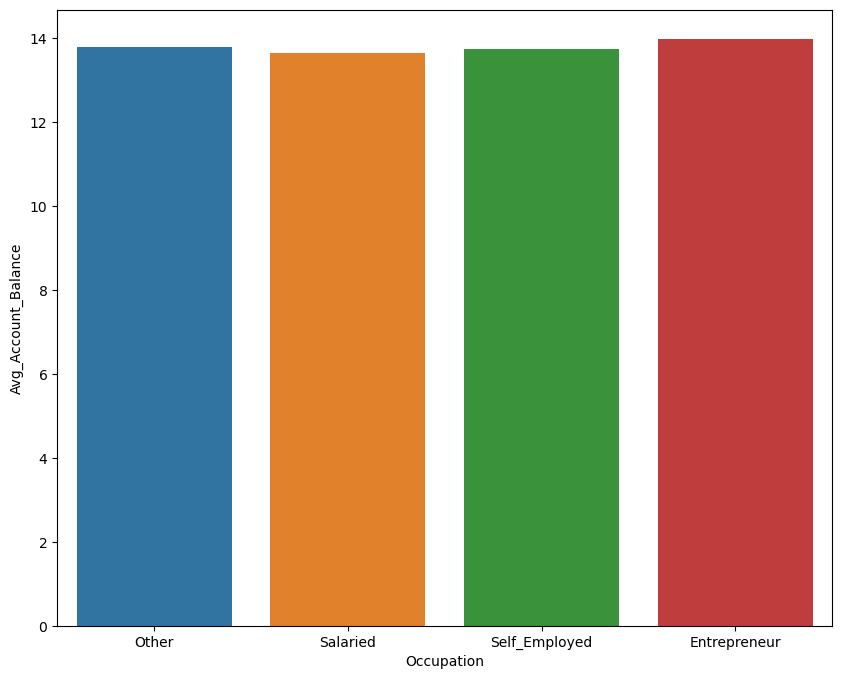

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x="Occupation",y="Avg_Account_Balance",ci=True)

#### Insight:
* in the given chart the entrepreneur are having the highest number of account balance
* and also show thoes are customer works as employe are having lower number of account balance

#### Encoding The Columns

In [26]:
# Encoding tecnique are used to convert catgorical data into numerical,coz many algoeithm require numerical input in order to function properly

# i used one_hot encoding to perform encoding operation.

cat_col=["Gender","Occupation","Channel_Code","Credit_Product","Is_Active",'Region_Code']
print(df[cat_col].nunique())

Gender             2
Occupation         4
Channel_Code       4
Credit_Product     2
Is_Active          2
Region_Code       35
dtype: int64


In [27]:
# i used 'get_dummies()'function

encoded_df=pd.get_dummies(df,columns=cat_col)
encoded_df

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,4.290459,3.761200,13.860193,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.401197,3.465736,13.274205,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,4.025352,3.258097,14.210464,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.526361,2.944439,13.061453,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.401197,3.496508,13.695360,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,3.931826,4.691348,14.470741,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
245721,3.295837,2.708050,13.668114,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
245722,3.258097,2.564949,13.416016,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
245723,3.332205,3.433987,12.917806,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# replacing encoded data in original variable
df=encoded_df
df   


,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,4.290459,3.761200,13.860193,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.401197,3.465736,13.274205,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,4.025352,3.258097,14.210464,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.526361,2.944439,13.061453,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.401197,3.496508,13.695360,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,3.931826,4.691348,14.470741,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
245721,3.295837,2.708050,13.668114,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
245722,3.258097,2.564949,13.416016,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
245723,3.332205,3.433987,12.917806,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Checking the shape of data

In [29]:
df.shape

(245703, 53)

* Now we can se that after encoding the value of number of columns is increase from (11 to 55 ) this improve dimensionality

### check correlation

In [30]:
correlations=df.corr()['Is_Lead'].sort_values(ascending=False)
print(correlations)

Is_Lead                     1.000000
Vintage                     0.260850
Age                         0.254888
Channel_Code_X3             0.190119
Channel_Code_X2             0.131502
Credit_Product_Yes          0.117715
Occupation_Entrepreneur     0.104278
Is_Active_Yes               0.085705
Occupation_Self_Employed    0.076016
Avg_Account_Balance         0.073290
Gender_Male                 0.072079
Region_Code_RG268           0.060905
Region_Code_RG283           0.056197
Region_Code_RG284           0.043831
Occupation_Other            0.011494
Region_Code_RG276           0.010189
Region_Code_RG253           0.004444
Region_Code_RG265           0.004023
Channel_Code_X4             0.003786
Region_Code_RG273           0.000157
Region_Code_RG280          -0.000929
Region_Code_RG255          -0.001031
Region_Code_RG251          -0.001898
Region_Code_RG277          -0.002910
Region_Code_RG279          -0.003504
Region_Code_RG258          -0.003539
Region_Code_RG278          -0.003594
R

* from correlation we see that (occupation_salaried,Credit_product_no and Channel_code_x1) have a high negative correlation with output column so we remove this cloumns

### Drop the columns

In [31]:
df.drop("Occupation_Salaried",axis=1,inplace=True)
df.drop("Credit_Product_No",axis=1,inplace=True)
df.drop("Channel_Code_X1",axis=1,inplace=True)

In [32]:
df.shape

(245703, 50)

<Axes: >

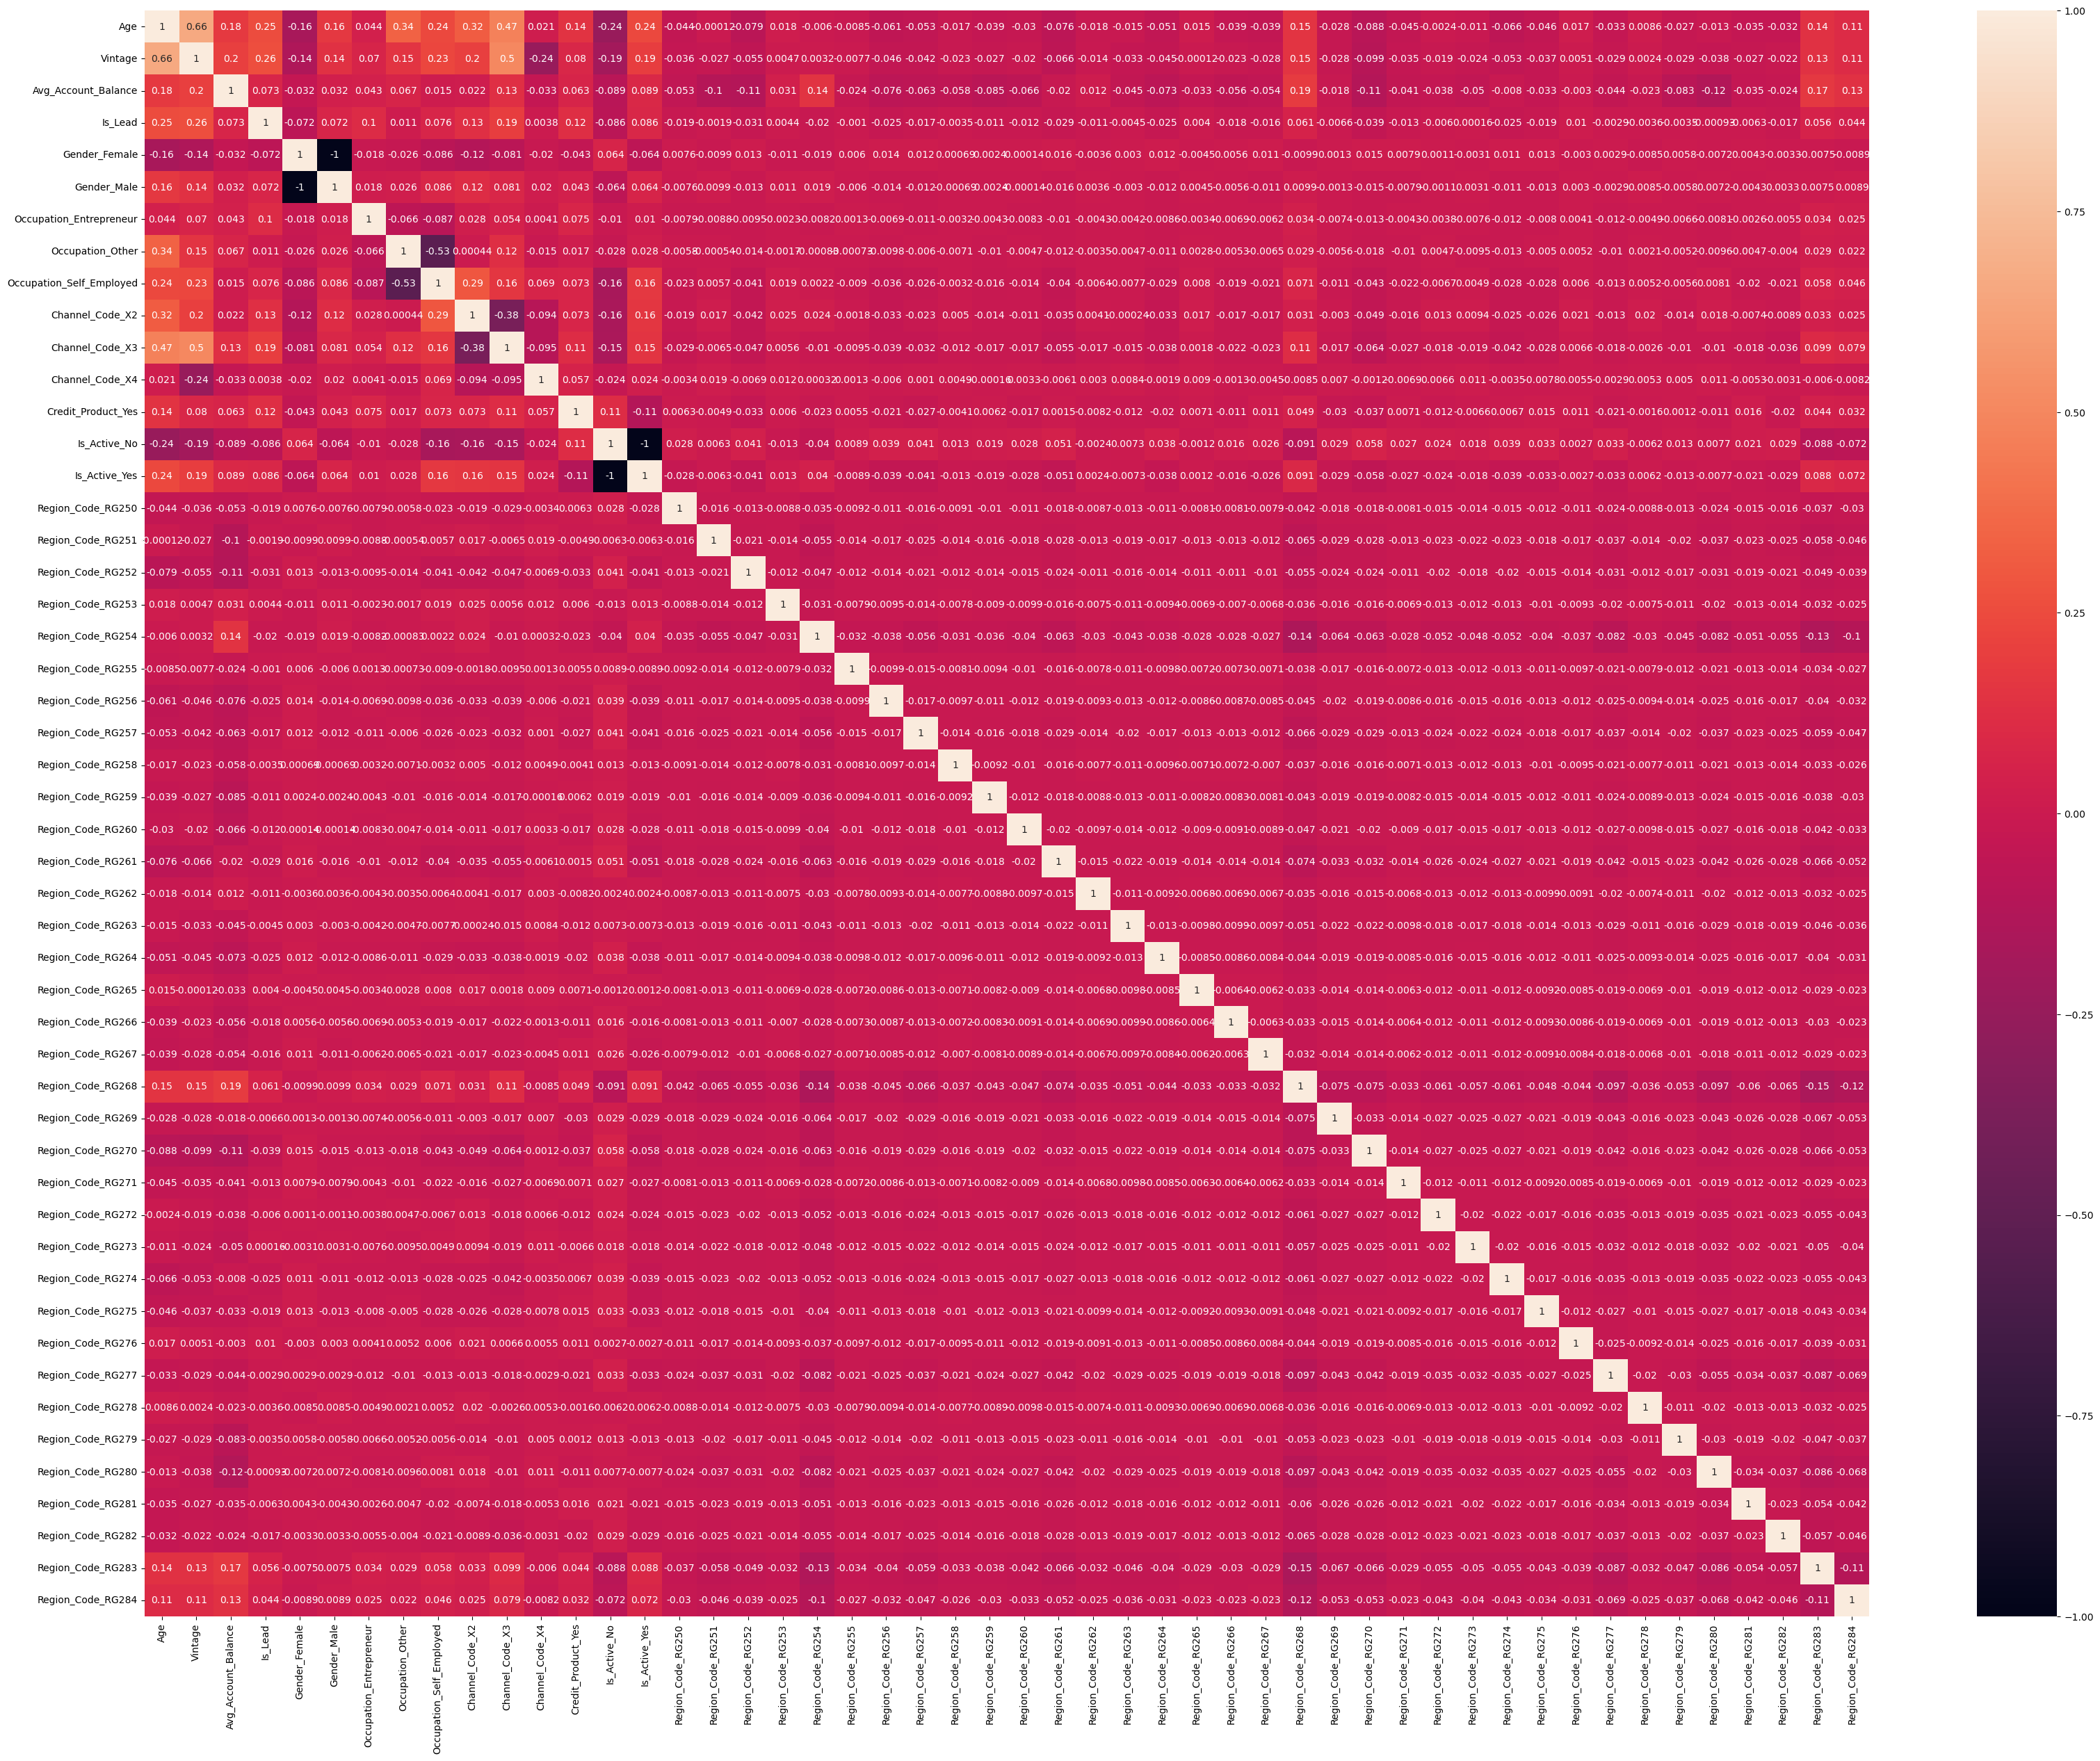

In [33]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

### Model building

* Define The Input And Target Varible Using Train Test Split

In [34]:
# input varible

x=df.drop(columns=["Is_Lead"]) 

# output or target varible

y=df["Is_Lead"]

In [35]:
# Import Segregating data from scikit learn

from sklearn.model_selection import train_test_split


In [36]:
# split data into training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [37]:
x_train.shape

(171992, 49)

In [38]:
x_test.shape

(73711, 49)

### Standardization of data

In [39]:
# importing StandardScaler from scikit lerarn

from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
x_train

array([[ 0.56160716,  1.70823102,  0.64824528, ..., -0.15597738,
        -0.36895885, -0.29175851],
       [ 1.3960748 ,  1.77568612,  0.76810717, ..., -0.15597738,
        -0.36895885, -0.29175851],
       [-1.29044117, -0.9370369 , -2.72309119, ..., -0.15597738,
        -0.36895885, -0.29175851],
       ...,
       [ 0.95543406,  1.31225795, -0.92789925, ..., -0.15597738,
        -0.36895885, -0.29175851],
       [ 0.50088462, -2.35124268, -1.25753815, ...,  6.41118591,
        -0.36895885, -0.29175851],
       [ 0.24492888,  0.98858711,  0.31302115, ..., -0.15597738,
        -0.36895885,  3.42749214]])

## 1.logestic regression

In [41]:
# Importing Logestic Regression model from scikit learn

from sklearn.linear_model import LogisticRegression,LinearRegression

In [42]:
logr=LogisticRegression()

In [43]:
logr.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred_logr=logr.predict(x_test)

In [45]:
# importing performance matrix from scikit learn

from sklearn.metrics import r2_score,accuracy_score,recall_score  
print(accuracy_score(y_test,y_pred_logr))  # taking accuracy score for calculation coz problem statement more focus on type 1 error
print(recall_score(y_test,y_pred_logr))       # ('Flase postive')

0.7774551966463621
0.10454930771404351


#### Accuracy of logestic regression is 0.778 ...(77.8%)
used differnt tecnique to improve model performance...

1.Regulariation tecnique..

In [46]:
# i used l1 regularization 

log=LogisticRegression(penalty='l1',solver='liblinear')
log.fit(x_train,y_train)

score = log.score(x_test,y_test)
print('accuracy:{:.2f}%'.format(score*100))

accuracy:77.75%


* After regularization we see that we got same accuracy

2.Cross-Validation..

In [47]:
from sklearn.model_selection import cross_val_score

# 1st create logistic regression object
log = LogisticRegression(max_iter=1000)

# data devided into 5 fold k-5
scores=cross_val_score(log,x,y,cv=5)

print('Cross-validation scores:',scores)
print('mean accuracy: {:.2f}%'.format(scores.mean()*100))

Cross-validation scores: [0.77981726 0.78162838 0.7802446  0.78001628 0.77997558]
mean accuracy: 78.03%


3.GridSearcheCV tecnique..

In [48]:
# importing GridsearchCV from skilt learn

from sklearn.model_selection import GridSearchCV

In [49]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
# slecting the parameter 


params={"max_iter":[20,100],"C":[0.05,1.0],'penalty':['l2']}
logetun=GridSearchCV(logr,params,cv=20)
logetun.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 1.0], 'max_iter': [20, 100],
                         'penalty': ['l2']})

In [51]:
# slecting best parameters

logetun.best_params_

{'C': 1.0, 'max_iter': 20, 'penalty': 'l2'}

In [52]:
logetun.best_score_

0.7815654118786122

In [53]:
print('accuracy:{:.2f}%'.format(logetun.best_score_*100))

accuracy:78.16%


final accuracy for logestic regression is =78.16

### 2.Decision Tree

In [54]:
# Importing DecisionTreeClassifier model from scikit learn

from sklearn.tree import DecisionTreeClassifier,plot_tree

In [55]:
# instantiate the DecisionTreeClassifier model with criterion entropy

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [56]:
 #fit the model

dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [57]:
y_pred_dtcm=dtc.predict(x_test)

#### Check accuracy score with criterion entropy..
* 1st check accuracy score with entropy criterion

In [58]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_dtcm)))

Model accuracy score with criterion entropy: 0.7804


### Check accuracy score with criterion gini index..
* 2nd used gini index criterion

In [59]:
dtc=DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
dtc.fit(x_train,y_train)
y_pred_gini=dtc.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7833


we get same accuracy for both the cases...

### Visualize decision-trees

[Text(0.5, 0.9285714285714286, 'x[1] <= 0.804\ngini = 0.361\nsamples = 171992\nvalue = [131400, 40592]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= -0.554\ngini = 0.262\nsamples = 121572\nvalue = [102684, 18888]'),
 Text(0.125, 0.6428571428571429, 'x[8] <= 0.501\ngini = 0.146\nsamples = 64361\nvalue = [59248, 5113]'),
 Text(0.0625, 0.5, 'x[11] <= 0.456\ngini = 0.134\nsamples = 61945\nvalue = [57461, 4484]'),
 Text(0.03125, 0.35714285714285715, 'x[6] <= 0.477\ngini = 0.118\nsamples = 50414\nvalue = [47254, 3160]'),
 Text(0.015625, 0.21428571428571427, 'x[10] <= 3.204\ngini = 0.132\nsamples = 39806\nvalue = [36974, 2832]'),
 Text(0.0078125, 0.07142857142857142, 'gini = 0.13\nsamples = 39528\nvalue = [36766, 2762]'),
 Text(0.0234375, 0.07142857142857142, 'gini = 0.377\nsamples = 278\nvalue = [208, 70]'),
 Text(0.046875, 0.21428571428571427, 'x[9] <= 0.491\ngini = 0.06\nsamples = 10608\nvalue = [10280, 328]'),
 Text(0.0390625, 0.07142857142857142, 'gini = 0.056\nsamples = 10325\nvalue = [10

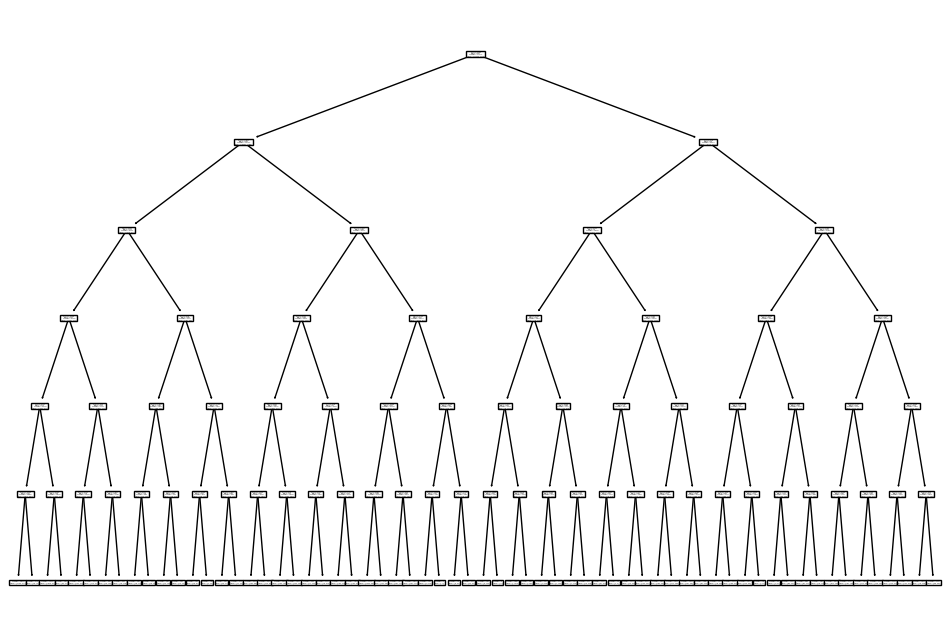

In [61]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dtc.fit(x_train, y_train)) 

Used differnt tecnique to improve model performance...

1.Gridsearchcv()

In [62]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [63]:
# define parameter

params={"max_depth":[10,20],"max_leaf_nodes":[250,270],"min_samples_split":[5,8]}
dtct=GridSearchCV(dtc,params,cv=10)
dtct.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=6, random_state=0),
             param_grid={'max_depth': [10, 20], 'max_leaf_nodes': [250, 270],
                         'min_samples_split': [5, 8]})

In [64]:
# selecting the best parameter
dtct.best_params_

{'max_depth': 20, 'max_leaf_nodes': 250, 'min_samples_split': 5}

In [65]:
# training accuracy
dtct.score(x_train,y_train)  

0.7950951207032885

In [66]:
# testing accuracy
dtct.score(x_test,y_test)

0.7898414076596437

We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7959 while the test-set accuracy to be 0.790. These two values are quite comparable. So, there is no sign of overfitting...

#### Used Confusion Metrics

In [67]:
# confusion matrix are used to evalute the model perforamce

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dtcm)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[54529  1487]
 [14703  2992]]


<Axes: >

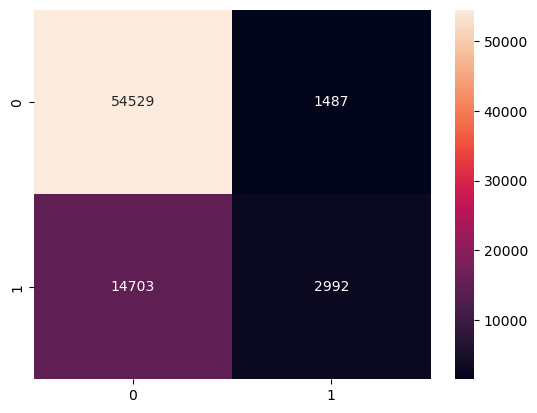

In [68]:
# visualise useing seaborn

import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

##### from heatmap we see that our model predicted well

Classification Report

* Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dtcm))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     56016
           1       0.67      0.17      0.27     17695

    accuracy                           0.78     73711
   macro avg       0.73      0.57      0.57     73711
weighted avg       0.76      0.78      0.73     73711



Final accuracy for logestic regression is =79.50

### 3.Random forest...

In [70]:
# Importing Random Forest model from scikit learn

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [71]:
# instantiate the DecisionTreeClassifier model with criterion entropy

rfc= RandomForestClassifier()

In [72]:
# fit the model

rfc.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
RandomForestClassifier()

RandomForestClassifier()

In [74]:
# make a prediction

y_pred_rfc=rfc.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred_rfc)

0.7750539268223195

For the Random forest we get accuracy_score '0.77612'

#### Using gridsearchcv() to improve model performance

In [76]:
# Gets the parameters

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
# selecting parameters.

params={"max_depth":[2,5,10,30],"min_samples_split":[5,10,30],"min_impurity_decrease":[1.0,2.0],"n_estimators":[20,40],"random_state":[34,40]}
rfct=GridSearchCV(rfc,params,cv=5)
rfct.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 30],
                         'min_impurity_decrease': [1.0, 2.0],
                         'min_samples_split': [5, 10, 30],
                         'n_estimators': [20, 40], 'random_state': [34, 40]})

In [78]:
# slecting the best paramters.

rfct.best_params_

{'max_depth': 2,
 'min_impurity_decrease': 1.0,
 'min_samples_split': 5,
 'n_estimators': 20,
 'random_state': 34}

In [79]:
rfct.best_score_

0.7639890229002038

As we can see that accuracy decreases after the gridsearchcv so we will consider our normal accuracy

### 4. Ada boost classifier

In [80]:
# Importing Ada Boost Classifier model from scikit learn

from sklearn.ensemble import AdaBoostClassifier

In [81]:
ada=AdaBoostClassifier()

In [82]:
# fit the model
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [83]:
# make a prediction

y_pred_ada=ada.predict(x_test)

In [84]:
# accuracy score
ada.score(x_test,y_test)

0.7796122695391461

For the Ada boost classifier we get accuracy_score '0.77961

#### Using gridsearchcv() to improve model performance

In [85]:
# getting all parameters
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [86]:
# slecting the parameter
params={"learning_rate":[1.0],"n_estimators":[200],"random_state":[10]}
adat=GridSearchCV(ada,params,cv=10)
adat.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.0], 'n_estimators': [200],
                         'random_state': [10]})

In [87]:
# best parameters
adat.best_params_

{'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 10}

In [88]:
# final score
adat.best_score_

0.7827864011834111

After GridSearchCV we get accuracy_score '0.7827'

### Accuracy_score of all the models are....
#### For logestic regression we get acurracy= 0.7816 (78.17%)
#### For Decision tree we get accuracy= 0.7950 (79.50%)
#### For random forest we get accuracy = 0.7753 (77.53%)
#### For adaboost we get accuracy = 0.7827 (78.27%)

#### conculsion:
#### As we see that all models gives realtively same accuracy_score but the "DECISION TREE" model is having high accuracy score as compared to all other models... so we consider "DECISION TREE" model for this data set.